# Evaluation of Predictions of the Best Models


In [13]:
import pandas as pd 
# Both models were trained on multilingual dataset containing 1800 examples, with a test set of 180-270 labelled examples and validation set 200 examples
df_en = pd.read_csv("/home/deimann/climate-protests/climate-protests-eval/climate_action_labelling - xlmRobase375-en-evalpreds.csv") # 25 epochs
df_de = pd.read_csv('/home/deimann/climate-protests/climate-protests-eval/climate_action_labelling - bertbaseMultiCased51-de-evalpreds.csv') # 13 epochs

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
print('English Set Gold Labels:')
print(df_en['Label'].value_counts())
print('English Set Predicted Labels:')
print(df_en['Predicted'].value_counts())

English Set Gold Labels:
 1    60
-1    29
 0    11
Name: Label, dtype: int64
English Set Predicted Labels:
 1    61
-1    32
 0     7
Name: Predicted, dtype: int64


In [16]:
print('German Set Gold Labels:')
print(df_de['Label'].value_counts())
print('German Set Predicted Labels:')
print(df_de['Predicted'].value_counts())

German Set Gold Labels:
 1    55
-1    33
 0    12
Name: Label, dtype: int64
German Set Predicted Labels:
 1    56
-1    32
 0    12
Name: Predicted, dtype: int64


#### After re-evaluation of the Predictions with following Labels on the validation set (multi-lingual set of 100 in each language):
#### OK: Perfect label, acceptable prediction
#### NOK: Not OK, wrong prediction (extra label p/m appended, depending on the direction of the misprediction)
#### \ : Impossible to make a right/wrong call, will exclude those examples from the re-evaluation
#### 
#### Got the following results:

In [17]:
print('English Set:')
print(df_en['Evaluation'].value_counts())
print()
print('German Set re-evaluation:')
print(df_de['Evaluation'].value_counts())

English Set:
OK     86
NOK    11
\       3
Name: Evaluation, dtype: int64

German Set re-evaluation:
OK     80
\      11
NOK     9
Name: Evaluation, dtype: int64


In [21]:
print('Further inspection of NOK yields the following results:')
print()
print('English Set NOK inspection:')
print(df_en['p/m'].value_counts())
print('-->> slight bias to mis-predict -1 (against climate action) instead of +1.')
print()
print('German Set NOK inspection:')
print(df_de['p/m'].value_counts())
print('-->> the NOK almost balance each other out exactly, which means the NOK can be ignored and do not make the predictions worse.')

Further inspection of NOK yields the following results:

English Set NOK inspection:
m    7
p    4
Name: p/m, dtype: int64
-->> slight bias to mis-predict -1 (against climate action) instead of +1.

German Set NOK inspection:
p    5
m    4
Name: p/m, dtype: int64
-->> the NOK almost balance each other out exactly, which means the NOK can be ignored and do not make the predictions worse.


## English Plot

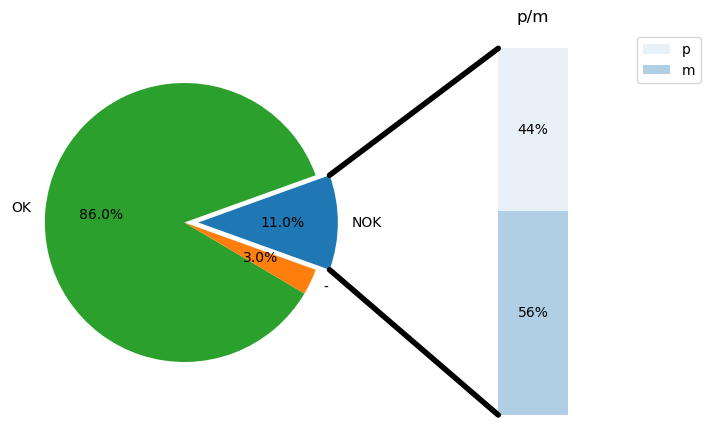

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.11, .86, .03]
labels = ['NOK', 'OK', '-']
explode = [0.1, 0, 0]

# Swap colors between 'OK' and '-'
colors = ['C0', 'C2', 'C1']
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=colors)

# bar chart parameters
age_ratios = [5/9, 4/9]
age_labels = ['m', 'p']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('p/m')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0,0,0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0,0,0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()


## German Plot

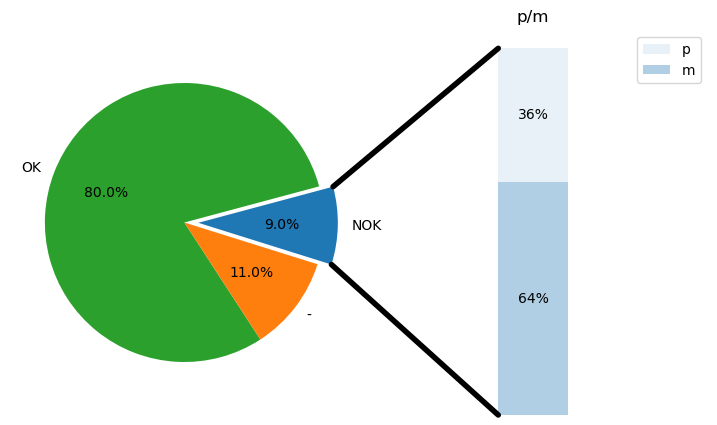

In [4]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.8, .11, .09]
labels = ['OK', '-', 'NOK']

# Set explode array to explode only the 'NOK' section
explode = [0, 0, 0.1]

# Set startangle to 15 to rotate the pie chart anti-clockwise
angle = 15
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=['C2', 'C1', 'C0'])

# bar chart parameters
age_ratios = [7/11, 4/11]
age_labels = ['m', 'p']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('p/m')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta_nok_start, theta_nok_end = wedges[2].theta1, wedges[2].theta2
center, r = wedges[2].center, wedges[2].r
bar_height = sum(age_ratios)

# draw top connecting line for 'NOK' section
x_top = r * np.cos(np.pi / 180 * theta_nok_end) + center[0]
y_top = r * np.sin(np.pi / 180 * theta_nok_end) + center[1]
con_top = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                          xyB=(x_top, y_top), coordsB=ax1.transData)
con_top.set_color([0, 0, 0])
con_top.set_linewidth(4)
ax2.add_artist(con_top)

# draw bottom connecting line for 'NOK' section
x_bottom = r * np.cos(np.pi / 180 * theta_nok_start) + center[0]
y_bottom = r * np.sin(np.pi / 180 * theta_nok_start) + center[1]
con_bottom = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                             xyB=(x_bottom, y_bottom), coordsB=ax1.transData)
con_bottom.set_color([0, 0, 0])
ax2.add_artist(con_bottom)
con_bottom.set_linewidth(4)

plt.show()


#### Leaving out the disgarded '\\' - section gives us the following pie charts:

## English Pie

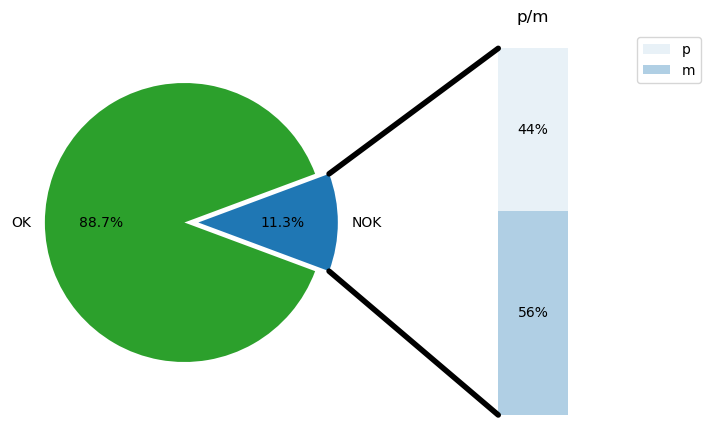

In [5]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [11/97, 86/97]
labels = ['NOK', 'OK']
#explode = [0.1, 0, 0]
explode = [0.1, 0]

# Swap colors between 'OK' and '-'
colors = ['C0', 'C2']
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=colors)

# bar chart parameters
age_ratios = [5/9, 4/9]
age_labels = ['m', 'p']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('p/m')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0,0,0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0,0,0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()


## German Pie

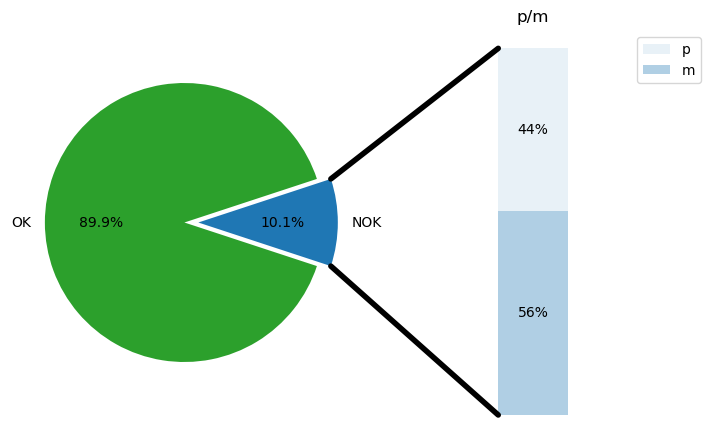

In [17]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9/89, 80/89]
labels = ['NOK', 'OK']
#explode = [0.1, 0, 0]
explode = [0.1, 0]

colors = ['C0', 'C2']
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=colors)

# bar chart parameters
age_ratios = [5/9, 4/9]
age_labels = ['m', 'p']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('p/m')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0,0,0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0,0,0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

